# Maximum radius per metallicity


In [1]:
import matplotlib
import pickle
from matplotlib import rc
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
from astropy.table import Table

import os
home_dir = os.path.expanduser("~")

######################################
## PLOT setttings
plt.rc('font', family='serif')
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
rc('text', usetex=False)
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,18,25,30
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=MEDIUM_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

#################################################################
##   Parameters to set
################################################################# 
home_dir = os.path.expanduser("~") 
Zenodo_data_dir = f'{home_dir}/ceph/CompasOutput/Zenodo_vanSon2024' # change to your local path
root_out_dir    = Zenodo_data_dir



# Load your grid of effectively single stars 

see [this notebook for Fig 2](Fig2_MaxR_andP_cases.ipynb) for the code to run the grid of single stars, and how the data is collected into the dictionary

In [2]:
with open(f'{root_out_dir}/Single_star_data.pkl', 'rb') as f:
    data = pickle.load(f)

# Plot the maximum radius as a function of metallicity for every system

unique_type_values [2 4 5]
10
20
30
40
50
60
70
90
100
150


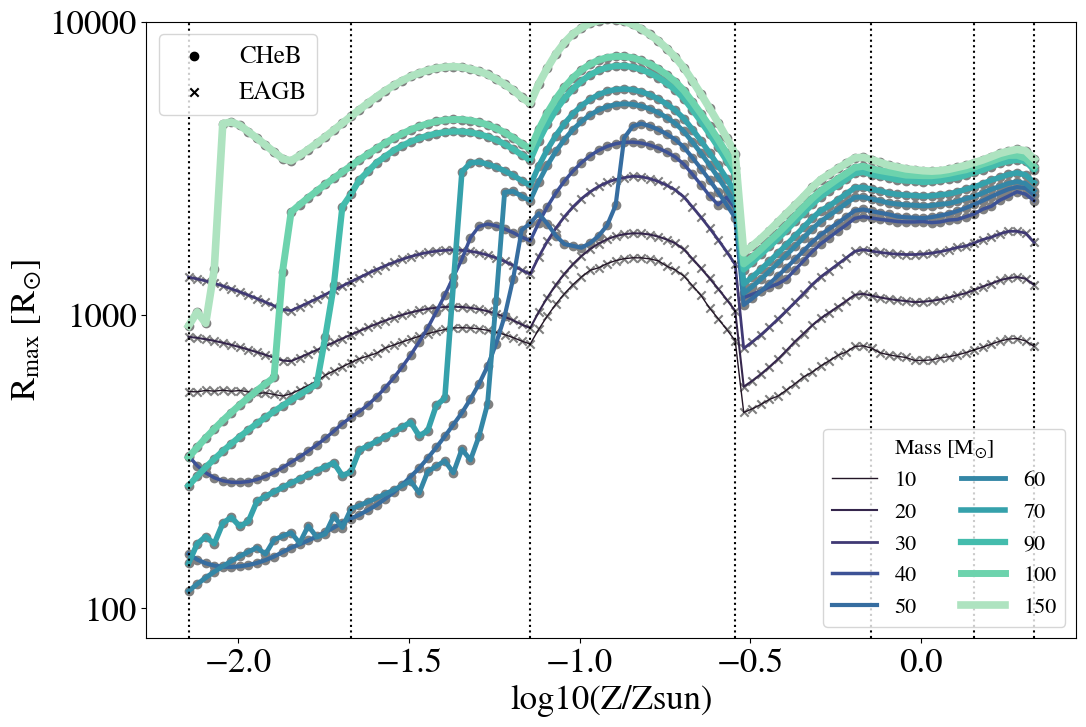

In [3]:
# Mapping types to names 
Stellar_Type_table = Table()
Stellar_Type_table['types'] = ['MS_low', 'MS' ,'HG', 'AGB', 'CHeB', 'EAGB','TPAGB','HeMS','HeHG','HeGB','HeWD','COWD','ONeWD','NS','BH','massless remnant']
Stellar_Type_table['indices'] = np.arange(len(Stellar_Type_table))

colors =  sns.color_palette("mako", len(data['M0'])) # color for masses

###
# Create a colormap for the stellar types and a normalization
unique_type_values = np.unique(data['maxR_type'][:]) # Get unique stellar types at R max
print('unique_type_values', unique_type_values)
newcmp = ListedColormap(['#a8a8a8', '#707070'])

linestyles = ['-']
marker_dict = {4: 'o', 5: 'x'}  # to indicate the type

fig, ax = plt.subplots(figsize =(12,8))

# Plot the data
for mi, mass in enumerate(data['M0']):
    print(mass)
    # Different marker for different stellar type
    marker = marker_dict.get(data['maxR_type'][mi][0], 'o')  # Default to 'o' if the type is not in the dictionary
    im = plt.scatter(np.log10(np.array(data['Metals'][mi])/0.014), np.log10(data['maxRadii'][mi]), marker = marker, c = 'grey')
    
    plt.plot(np.log10(np.array(data['Metals'][mi])/0.014), np.log10(data['maxRadii'][mi]), c = colors[mi], lw = 1 + 0.5*mi, label = mass, linestyle = linestyles[mi % len(linestyles)])

first_legend  = plt.legend(title = 'Mass [M$_{\odot}$]', fontsize = 16, title_fontsize = 16, ncol = 2, loc = 'lower right')

# Add vertical lines at the Hurley run grid
Hurley_Z = np.array([0.0001, 0.0003, 0.001, 0.004, 0.01, 0.02, 0.03])
ax.vlines(np.log10(Hurley_Z/0.014), 1.9, 4, colors = 'k', linestyles = 'dotted')

# Add the first legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Make little legend for the markers
marker_legends = []
for key in marker_dict:
    marker_legends.append(plt.scatter([], [], c='k', marker=marker_dict[key], label=f"{Stellar_Type_table['types'][key]}"))
plt.legend(handles=marker_legends, loc='upper left')

plt.xlabel('log10(Z/Zsun)')
plt.yticks([1, 2, 3, 4.], ['10','100', '1000', '10000'])
plt.ylim(1.9, 4.)
plt.ylabel('R$_{\mathrm{max} }$ [R$_{\odot}$]')
plt.savefig('../Figures/MaxRadius_perZ.pdf',bbox_inches='tight')

plt.show()